In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import numpy as np
import xgi
import matplotlib.pyplot as plt
from src import *
import networkx as nx

In [29]:
G = nx.karate_club_graph()
G = nx.barbell_graph(4, 1)

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

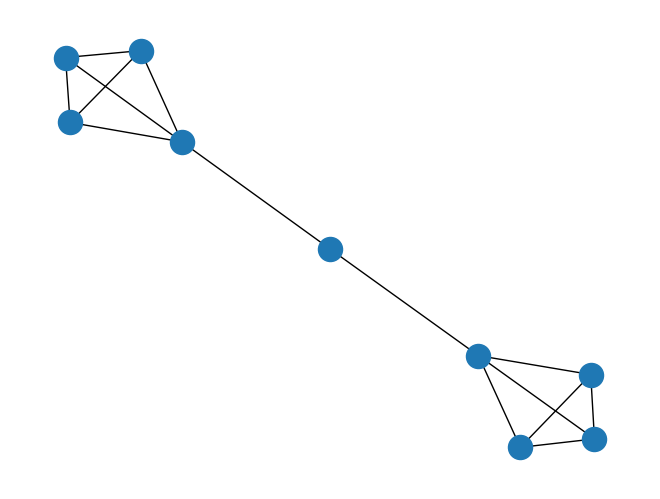

In [30]:
nx.draw(G)

In [31]:
rho = 0.05
save_data = False

In [60]:
s0 = np.zeros(n)
p_s = 0.2
s0[list(random.sample(range(n), int(p_s * n)))] = 1

alpha = 0
gamma = 0.05
beta = 0.07

contagion_function = lambda nu, beta: 1 - (1 - beta) ** nu
c = contagion_function(np.arange(n), beta)

x = contagion_process(A, gamma, c, s0, tmin=0, tmax=100, random_seed=None)

In [61]:
c

array([0.        , 0.07      , 0.1351    , 0.195643  , 0.25194799,
       0.30431163, 0.35300982, 0.39829913, 0.44041819])

In [48]:
samples = 1000

rho = np.zeros(samples)
gamma = np.zeros(samples)
c = np.zeros((samples, n))

for i in range(1000):
    r, g, b = infer_dynamics(x, A)
    rho[i] = r
    gamma[i] = g
    c[i] = b

[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.   0.   0.   0.   0.]
[ 0. 11. 11.  8.  2.  0.  0.  0.  0.]
[259. 124.  38.  41.   1.  

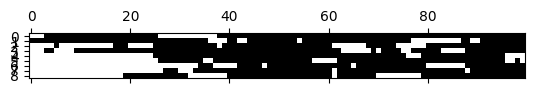

In [10]:
plt.spy(x.T)

In [79]:
A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho))

samples, lvals = infer_adjacency_matrix(
    x, A, c, rho, nsamples=100, burn_in=1000, skip=100, return_likelihoods=True
)

Acceptance ratio is 0.0


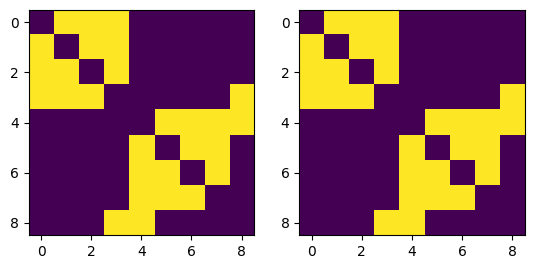

In [80]:
p = np.round(np.mean(samples, axis=0))
plt.subplot(121)
plt.imshow(p)
plt.subplot(122)
plt.imshow(A.todense())

In [77]:
G = nx.Graph(p)

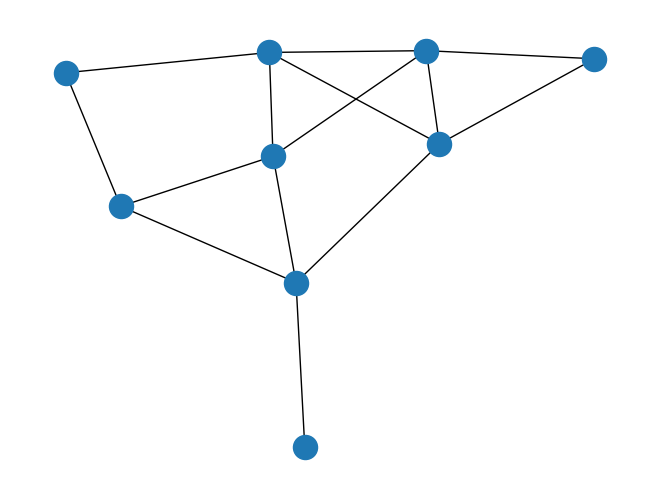

In [78]:
nx.draw(G)

In [30]:
nu_list = np.linspace(0, 1, 10)

samples_nu, ps_nu = vary_nu(
    A,
    gamma,
    beta,
    alpha,
    c,
    f,
    rho,
    nu_list,
    num_realizations=10,
    tmin=0,
    tmax=20,
    dt=1,
    nsamples=10,
    burn_in=10000,
    skip=100,
)

Acceptance ratio is 0.05532110091743119
Acceptance ratio is 0.05440366972477064
Acceptance ratio is 0.054862385321100916
Acceptance ratio is 0.05522935779816514
Acceptance ratio is 0.056055045871559635
Acceptance ratio is 0.05614678899082569
Acceptance ratio is 0.056605504587155964
Acceptance ratio is 0.057247706422018346
Acceptance ratio is 0.056422018348623856
Acceptance ratio is 0.05596330275229358
Acceptance ratio is 0.055412844036697245
Acceptance ratio is 0.057247706422018346
Acceptance ratio is 0.05678899082568807
Acceptance ratio is 0.05715596330275229
Acceptance ratio is 0.05733944954128441
Acceptance ratio is 0.06128440366972477
Acceptance ratio is 0.05706422018348624
Acceptance ratio is 0.05688073394495413
Acceptance ratio is 0.05522935779816514
Acceptance ratio is 0.057522935779816514
Acceptance ratio is 0.05926605504587156
Acceptance ratio is 0.058440366972477065
Acceptance ratio is 0.06064220183486239
Acceptance ratio is 0.06128440366972477
Acceptance ratio is 0.058440366

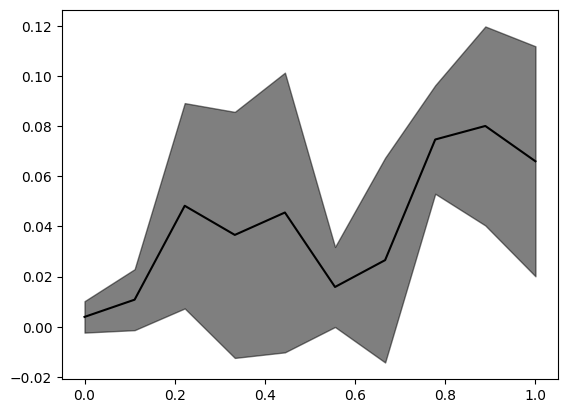

In [31]:
ps_nu_mean = np.mean(ps_nu, axis=1)
ps_nu_std = np.std(ps_nu, axis=1)

plt.plot(nu_list, np.mean(ps_nu, axis=1), color="black")
plt.fill_between(
    nu_list, ps_nu_mean - ps_nu_std, ps_nu_mean + ps_nu_std, alpha=0.5, color="black"
)

In [34]:
# tmax_list = np.linspace([10, 50, 100, 300, 1000])

samples_tmax, ps_tmax = vary_tmax(
    A,
    gamma,
    beta,
    f,
    rho,
    num_realizations=10,
    tmin=0,
    tmax=None,
    dt=1,
    nsamples=10,
    burn_in=10000,
    skip=100,
)

Acceptance ratio is 0.05321100917431193
Acceptance ratio is 0.052752293577981654
Acceptance ratio is 0.05651376146788991
Acceptance ratio is 0.054220183486238534
Acceptance ratio is 0.05532110091743119
Acceptance ratio is 0.052752293577981654
Acceptance ratio is 0.05100917431192661
Acceptance ratio is 0.05733944954128441
Acceptance ratio is 0.05743119266055046
Acceptance ratio is 0.05330275229357798
Acceptance ratio is 0.056605504587155964
Acceptance ratio is 0.05477064220183486
Acceptance ratio is 0.052660550458715594
Acceptance ratio is 0.054220183486238534
Acceptance ratio is 0.053669724770642205
Acceptance ratio is 0.056972477064220185
Acceptance ratio is 0.05229357798165138
Acceptance ratio is 0.05577981651376147
Acceptance ratio is 0.05293577981651376
Acceptance ratio is 0.056972477064220185
Acceptance ratio is 0.05532110091743119
Acceptance ratio is 0.05715596330275229
Acceptance ratio is 0.055137614678899084
Acceptance ratio is 0.05614678899082569
Acceptance ratio is 0.05467889

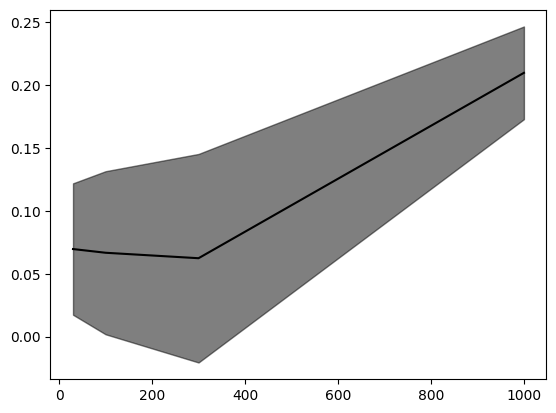

In [45]:
tmax_list = [30, 100, 300, 1000]
ps_tmax_mean = np.mean(ps_tmax, axis=1)
ps_tmax_std = np.std(ps_tmax, axis=1)

plt.plot(tmax_list, ps_tmax_mean, color="black")
plt.fill_between(
    tmax_list,
    ps_tmax_mean - ps_tmax_std,
    ps_tmax_mean + ps_tmax_std,
    alpha=0.5,
    color="black",
)

In [48]:
beta_list = np.linspace(0.1, 0.5, 5)
samples_beta, ps_beta = vary_beta(
    A,
    gamma,
    beta_list,
    f,
    rho,
    num_realizations=10,
    tmin=0,
    tmax=20,
    dt=1,
    nsamples=10,
    burn_in=10000,
    skip=100,
)

Acceptance ratio is 0.054862385321100916
Acceptance ratio is 0.05651376146788991
Acceptance ratio is 0.056422018348623856
Acceptance ratio is 0.05614678899082569
Acceptance ratio is 0.05532110091743119
Acceptance ratio is 0.05385321100917431
Acceptance ratio is 0.056605504587155964
Acceptance ratio is 0.05688073394495413
Acceptance ratio is 0.056055045871559635
Acceptance ratio is 0.055137614678899084
Acceptance ratio is 0.05339449541284404
Acceptance ratio is 0.05431192660550459
Acceptance ratio is 0.05733944954128441
Acceptance ratio is 0.05284403669724771
Acceptance ratio is 0.053944954128440366
Acceptance ratio is 0.05522935779816514
Acceptance ratio is 0.05495412844036697
Acceptance ratio is 0.053669724770642205
Acceptance ratio is 0.05770642201834862
Acceptance ratio is 0.0581651376146789
Acceptance ratio is 0.052752293577981654
Acceptance ratio is 0.05431192660550459
Acceptance ratio is 0.05348623853211009
Acceptance ratio is 0.05587155963302752
Acceptance ratio is 0.05385321100

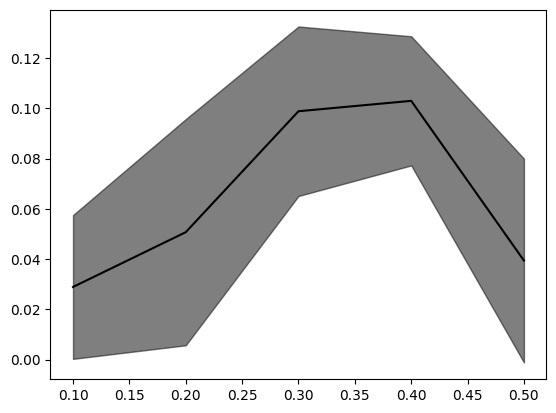

In [49]:
tmax_list = [30, 100, 300, 1000]
ps_beta_mean = np.mean(ps_beta, axis=1)
ps_beta_std = np.std(ps_beta, axis=1)

plt.plot(beta_list, ps_beta_mean, color="black")
plt.fill_between(
    beta_list,
    ps_beta_mean - ps_beta_std,
    ps_beta_mean + ps_beta_std,
    alpha=0.5,
    color="black",
)